In [1]:
import pandas as pd
import numpy as np
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = pd.read_csv('Embs_SubsetEvenEnv_Exploded.csv')

In [3]:
env.head()

,Unnamed: 0,run,seq,annotation,metaseek_env_package,emb0,emb1,emb2,emb3,emb4,...,emb94,emb95,emb96,emb97,emb98,emb99,emb100,emb101,emb102,emb103
0,0,ERR2022395,CTTGCAGAGAACGATTGGGACGGCTGGAAAGTATTGACCCAAGCCA...,4.2.1.11,plant-associated,-0.015510,-0.010262,0.014935,-0.011231,-0.009097,...,-0.014380,0.005230,0.004939,0.009507,-0.013818,0.000188,-0.002598,0.005329,-0.000532,-0.000742
1,1,ERR2022395,TCTCGGTGCCGTCCAGATCGATCAGGCGACGGTCCAGGCCTTCCTG...,4.2.1.11,plant-associated,0.020850,0.011211,0.027206,-0.025696,0.005398,...,-0.026406,0.028839,-0.026136,-0.002678,-0.015635,0.000666,-0.014427,0.001866,-0.000301,0.008127
2,2,ERR2022395,GTACCGGAACCGGCCAGATCAAATCCGGCGCGCCCGCCCGCGGAAA...,4.2.1.11,plant-associated,-0.007535,-0.011942,0.026035,-0.007946,-0.010868,...,-0.014092,0.019878,-0.001687,-0.004299,-0.006896,-0.000578,-0.000796,-0.005418,0.000011,-0.005327
3,3,ERR2022395,ACCGAGGATGGCGTTAGCACCGAGCTTGCCCTTGTTGTGGGTACCG...,4.2.1.11,plant-associated,-0.015738,-0.011305,0.022118,-0.016077,-0.005258,...,-0.011560,-0.001595,0.002635,0.002757,-0.013984,-0.000298,-0.029081,0.002874,0.000989,-0.006791
4,4,ERR2022395,CGACAAACCATGGCACGTTCAGCTCCATTGTTCCCTCGGGTGCATC...,4.2.1.11,plant-associated,-0.009379,-0.006676,0.014729,-0.008067,0.012392,...,-0.018498,0.006562,-0.003052,-0.001323,-0.007042,0.003828,-0.009022,-0.001849,-0.000046,-0.002645


In [4]:
#what is the average embedding for each env package
env_names = [] 
avgs = []
for pkg in set(env['metaseek_env_package']):
    subset = env[env['metaseek_env_package']==pkg]
    avg_emb = list(subset[subset.columns[5:]].mean(axis=0))
    env_names.append(pkg)
    avgs.append(np.array(avg_emb))
avgs = np.array(avgs)

In [5]:
avgs.shape

(10, 104)

In [6]:
avgs

array([[-0.00735178,  0.00803681,  0.01429348, ..., -0.00060257,
        -0.00228919, -0.00235653],
       [-0.00962248,  0.00817757,  0.02328672, ..., -0.00097896,
        -0.00140567, -0.0023598 ],
       [-0.00846379,  0.00656085,  0.01932978, ..., -0.00092857,
        -0.00101869, -0.00184788],
       ...,
       [-0.00703682,  0.01450287,  0.0305676 , ..., -0.00118622,
        -0.00055818, -0.00240167],
       [-0.00950097,  0.01539041,  0.02766401, ..., -0.00154602,
        -0.00045168, -0.00263555],
       [-0.00596115,  0.00192424,  0.01909564, ..., -0.00049418,
        -0.00200938, -0.00165361]])

In [7]:
env_names

['host-associated',
 'sediment',
 'plant-associated',
 'miscellaneous',
 'soil',
 'human-gut',
 'microbial mat/biofilm',
 'built environment',
 'wastewater/sludge',
 'water']

In [8]:
#what is the cosine similarity between each 
from sklearn.metrics.pairwise import cosine_similarity
sims = cosine_similarity(avgs)

In [9]:
sims.shape

(10, 10)

In [10]:
sims

array([[1.        , 0.88743371, 0.75564226, 0.85169492, 0.85936813,
        0.73765849, 0.91165128, 0.82556391, 0.84047383, 0.77232623],
       [0.88743371, 1.        , 0.84935008, 0.94851441, 0.94673984,
        0.92214635, 0.98247467, 0.91410221, 0.95582221, 0.8991139 ],
       [0.75564226, 0.84935008, 1.        , 0.89195812, 0.90451638,
        0.67522422, 0.83191368, 0.90455336, 0.83670434, 0.92154691],
       [0.85169492, 0.94851441, 0.89195812, 1.        , 0.97950164,
        0.81697316, 0.92939059, 0.93674414, 0.94690516, 0.85770982],
       [0.85936813, 0.94673984, 0.90451638, 0.97950164, 1.        ,
        0.80175637, 0.93815295, 0.96374439, 0.95045524, 0.86129914],
       [0.73765849, 0.92214635, 0.67522422, 0.81697316, 0.80175637,
        1.        , 0.91232492, 0.78709504, 0.90587916, 0.80242362],
       [0.91165128, 0.98247467, 0.83191368, 0.92939059, 0.93815295,
        0.91232492, 1.        , 0.92796042, 0.96166876, 0.87930927],
       [0.82556391, 0.91410221, 0.9045533

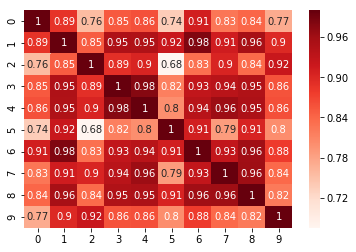

In [11]:
sns.heatmap(sims, annot=True, cmap='Reds')

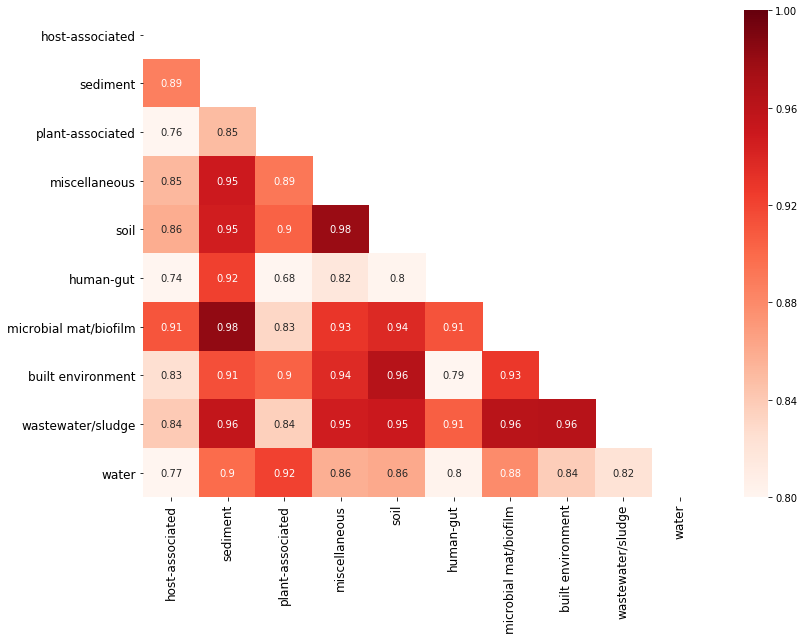

In [82]:
df_sims = pd.DataFrame(sims, index=env_names, columns=env_names)
mask = np.zeros_like(sims)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,9))
sns.heatmap(df_sims, cmap='Reds', mask=mask, annot=True, vmin=0.8)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('env_embsim.png',dpi=300)

In [13]:
Counter(env['metaseek_env_package']).most_common()

[('wastewater/sludge', 63883),
 ('soil', 57406),
 ('microbial mat/biofilm', 52552),
 ('water', 40684),
 ('miscellaneous', 36788),
 ('sediment', 31597),
 ('plant-associated', 25890),
 ('built environment', 23945),
 ('human-gut', 23513),
 ('host-associated', 20808)]

In [51]:
#get even subset 20k each env package for tsne
even_subset = pd.DataFrame()
for pkg in set(env['metaseek_env_package']):
    subset = env[env['metaseek_env_package']==pkg]
    toadd = subset.sample(20000)
    even_subset = even_subset.append(toadd)
even_subset = even_subset.reset_index()

,index,Unnamed: 0,run,seq,annotation,metaseek_env_package,emb0,emb1,emb2,emb3,...,emb94,emb95,emb96,emb97,emb98,emb99,emb100,emb101,emb102,emb103
0,164457,164457,ERR2200504,CTGCCGCTTTCCTCCAACCCGGAGATCAAAAAGACTCTGGGAACGC...,2.7.7.85,host-associated,-0.009579,-0.006481,-0.004325,-0.013168,...,-0.000697,0.003382,0.010333,-0.003006,0.002682,-0.000885,0.015633,-0.002027,-0.001480,-0.000065
1,15834,15834,ERR2241851,GGCGATTCGGTTACAACGGACCATATTTCACCGGCCGGTGCCATCA...,4.2.1.3,host-associated,-0.020144,0.024579,0.029150,-0.023587,...,-0.041712,0.024964,-0.006588,0.000868,-0.030989,-0.000200,-0.023523,0.000891,-0.001706,-0.001677
2,15293,15293,ERR2241851,GCTTCTGTCGGCCCTTATGGTGCATATTTAGCAGATGGCTCTGAAT...,2.1.1.10,host-associated,0.100916,0.038938,0.044357,-0.027801,...,-0.037030,0.009939,-0.013672,0.008382,-0.027332,-0.001267,-0.111879,0.000073,-0.001821,-0.001670
3,164551,164551,ERR2200504,AGCTGCTCTCGGCGGATTTACAAATGCTACTGACCTCGCTGACTAT...,4.3.2.1,host-associated,0.007042,0.002204,-0.018314,0.008609,...,0.013531,0.018712,0.006511,-0.014080,-0.000316,-0.002346,-0.003689,0.054567,-0.007686,-0.015542
4,335159,335159,ERR1135232,CAATGGCGTTTAGAATAGCATGGTTCAAAGTATATTATCCACTTGC...,2.7.7.7,host-associated,-0.012614,0.005729,-0.003145,-0.006967,...,-0.006589,0.017742,-0.020747,0.001194,-0.002757,-0.001779,0.002668,-0.000579,-0.002592,-0.000482
5,18535,18535,ERR2200674,TGTCCATCCCTTGCAGCAACAATTGACAAAAAGGCCAGGAACGAGC...,2.7.8.24,host-associated,-0.007451,0.003567,-0.012914,-0.000368,...,-0.001790,0.007909,0.007968,-0.007480,0.003452,-0.001623,0.003329,-0.005950,-0.006347,0.002158
6,17937,17937,ERR2200674,GGATGTGAATAGTGATCTGGATTTTGTTCGAGTTAATAAAGAGGCG...,2.7.7.13,host-associated,0.004615,0.008175,-0.001037,-0.008832,...,-0.012458,0.011098,-0.009044,0.002421,-0.006134,0.001057,-0.010502,-0.003666,-0.000121,0.000485
7,21922,21922,ERR2200674,TAACTGCAGAAATATTCTCCACATGAATGCGGCTCGCTACTTCCGG...,2.3.1.234,host-associated,0.001951,0.008296,-0.000135,-0.005330,...,0.001019,0.005562,-0.008678,-0.002495,-0.010588,0.000011,-0.014702,-0.002774,-0.003693,-0.004424
8,335798,335798,ERR1135232,GTGAGCTTATAACCGCATAAATGTAACATTGTATAGTAAAGCATAC...,2.2.1.1,host-associated,0.009866,0.004374,-0.002847,-0.011143,...,-0.004677,-0.010832,-0.019161,0.005616,0.000228,-0.000046,-0.004782,0.001144,-0.000741,-0.001658
9,12436,12436,ERR2241851,AATGCGGTTGCCGATGGCCGGGCGCAGCTCTTCCGGAATCGCCCCT...,1.17.99.6,host-associated,-0.089419,0.052731,0.053647,-0.008167,...,-0.053283,-0.004835,-0.012585,-0.002618,-0.049273,-0.001001,-0.014492,0.004522,-0.002877,-0.000276


In [53]:
Counter(even_subset['metaseek_env_package'])

Counter({'host-associated': 20000,
         'soil': 20000,
         'sediment': 20000,
         'miscellaneous': 20000,
         'plant-associated': 20000,
         'microbial mat/biofilm': 20000,
         'built environment': 20000,
         'water': 20000,
         'human-gut': 20000,
         'wastewater/sludge': 20000})

In [54]:
even_subset.to_csv('Embs_SubsetEven20k.csv')

In [27]:
#get even subset 20k each env package for tsne
small_subset = pd.DataFrame()
for pkg in set(env['metaseek_env_package']):
    subset = env[env['metaseek_env_package']==pkg]
    toadd = subset.sample(1000)
    small_subset = small_subset.append(toadd)
small_subset.reset_index(inplace=True)

In [63]:
small_subset.to_csv('Embs_SubsetEven1k.csv')

In [28]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(small_subset[small_subset.columns[6:]])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.026s...
[t-SNE] Computed neighbors for 10000 samples in 18.820s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.035437
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.848595
[t-SNE] KL divergence after 300 iterations: 2.470572


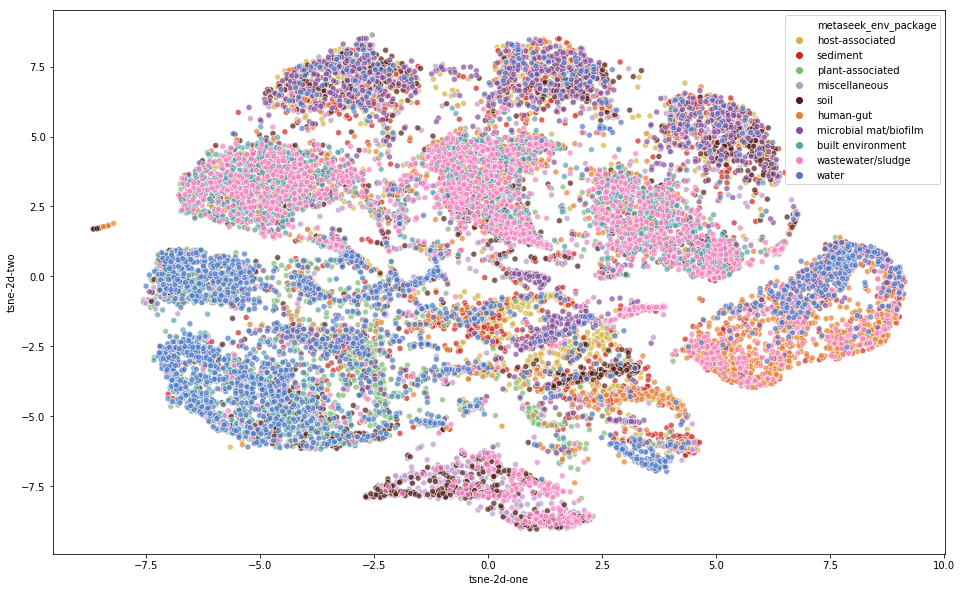

In [26]:
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['metaseek_env_package'] = small_subset['metaseek_env_package']

#cols - light purple, purple, dark purple, blue, turquoise, mint, yellow, orange, red, brown
#["#E7EBFA", "#B997C6", "#824D99", "#4E79C4", "#57A2AC", "#7EB875", "#D0B440", "#E67F33", "#CE2220", "#521913"]

cols = ["#D0B440","#CE2220","#7EB875","#B997C6","#521913","#E67F33","#824D99","#57A2AC","#F781BF","#4E79C4"]
#["#E41A1C", "blue", "#4DAF4A", "#984EA3", "#FF7F00", "gold", "#A65628", "#F781BF", "#999999","turquoise"]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='metaseek_env_package',
    palette=cols,
    data=df_subset,
    legend="full",
    alpha=0.7
)

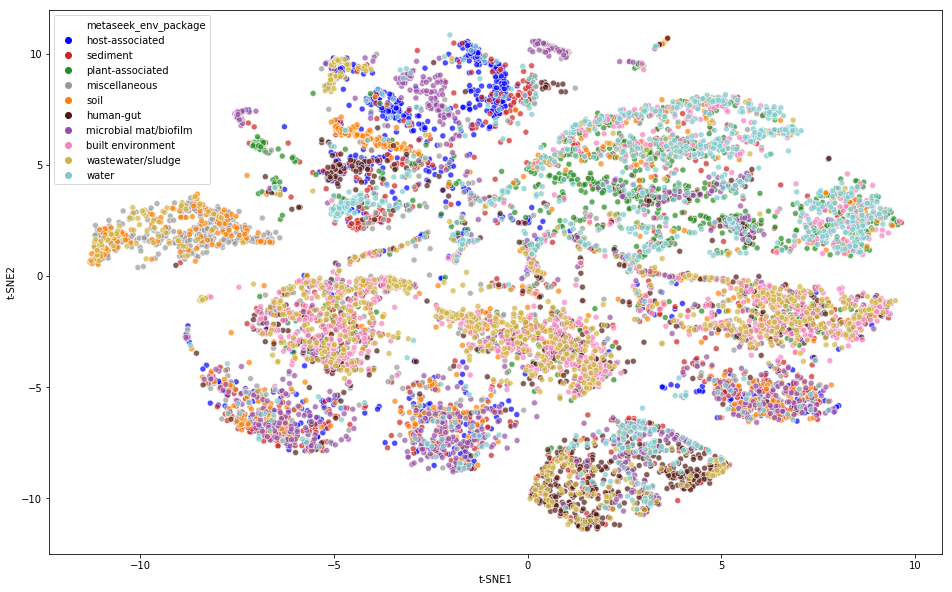

In [68]:
df_subset = pd.DataFrame()
df_subset['t-SNE1'] = tsne_results[:,0]
df_subset['t-SNE2'] = tsne_results[:,1]
df_subset['metaseek_env_package'] = small_subset['metaseek_env_package']
#["#E41A1C", "blue", "#4DAF4A", "#984EA3", "#FF7F00", "gold", "#A65628", "#F781BF", "#999999","turquoise"],

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="t-SNE1", y="t-SNE2",
    hue='metaseek_env_package',
    palette=["blue","#CE2220",  "#228C22", "#999999", "#FF7F00","#521913", "#984EA3",  "#F781BF", "#D0B440","#7DCACC"],
    data=df_subset,
    legend="full",
    alpha=0.7
)
plt.savefig('tsne_results.png',dpi=300)

In [69]:
df_subset.to_csv('tsne_results.csv')

In [83]:
even = pd.read_csv('Embs_SubsetEven20k.csv')
even.head()

,Unnamed: 0,Unnamed: 0.1,run,seq,annotation,metaseek_env_package,emb0,emb1,emb2,emb3,...,emb94,emb95,emb96,emb97,emb98,emb99,emb100,emb101,emb102,emb103
0,164457,164457,ERR2200504,CTGCCGCTTTCCTCCAACCCGGAGATCAAAAAGACTCTGGGAACGC...,2.7.7.85,host-associated,-0.009579,-0.006481,-0.004325,-0.013168,...,-0.000697,0.003382,0.010333,-0.003006,0.002682,-0.000885,0.015633,-0.002027,-0.001480,-0.000065
1,15834,15834,ERR2241851,GGCGATTCGGTTACAACGGACCATATTTCACCGGCCGGTGCCATCA...,4.2.1.3,host-associated,-0.020144,0.024579,0.029150,-0.023587,...,-0.041712,0.024964,-0.006588,0.000868,-0.030989,-0.000200,-0.023523,0.000891,-0.001706,-0.001677
2,15293,15293,ERR2241851,GCTTCTGTCGGCCCTTATGGTGCATATTTAGCAGATGGCTCTGAAT...,2.1.1.10,host-associated,0.100916,0.038938,0.044357,-0.027801,...,-0.037030,0.009939,-0.013672,0.008382,-0.027332,-0.001267,-0.111879,0.000073,-0.001821,-0.001670
3,164551,164551,ERR2200504,AGCTGCTCTCGGCGGATTTACAAATGCTACTGACCTCGCTGACTAT...,4.3.2.1,host-associated,0.007042,0.002204,-0.018314,0.008609,...,0.013531,0.018712,0.006511,-0.014080,-0.000316,-0.002346,-0.003689,0.054567,-0.007686,-0.015542
4,335159,335159,ERR1135232,CAATGGCGTTTAGAATAGCATGGTTCAAAGTATATTATCCACTTGC...,2.7.7.7,host-associated,-0.012614,0.005729,-0.003145,-0.006967,...,-0.006589,0.017742,-0.020747,0.001194,-0.002757,-0.001779,0.002668,-0.000579,-0.002592,-0.000482


In [85]:
#what is the average embedding for each env package
even_env_names = [] 
even_avgs = []
for pkg in set(even['metaseek_env_package']):
    subset = even[even['metaseek_env_package']==pkg]
    avg_emb = list(subset[subset.columns[6:]].mean(axis=0))
    even_env_names.append(pkg)
    even_avgs.append(np.array(avg_emb))
even_avgs = np.array(even_avgs)

In [86]:
#what is the cosine similarity between each 
from sklearn.metrics.pairwise import cosine_similarity
even_sims = cosine_similarity(even_avgs)

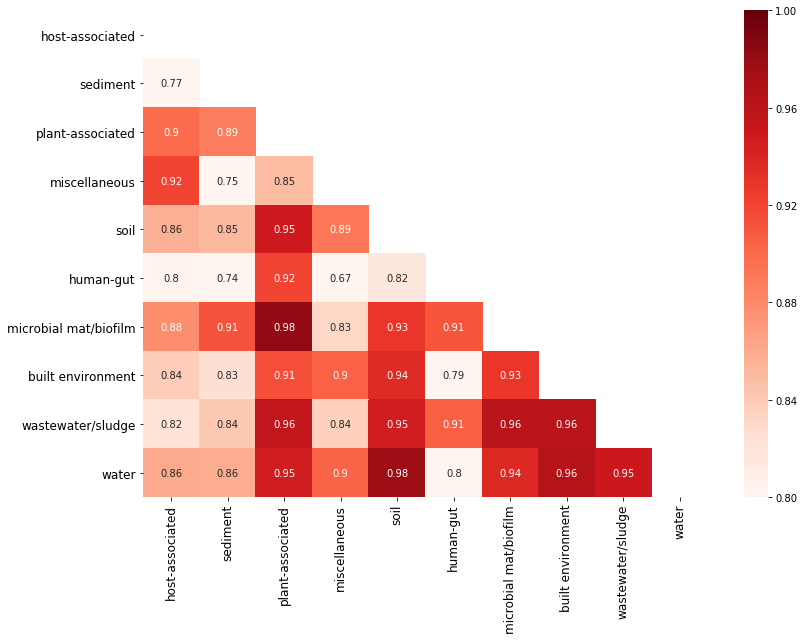

In [89]:
df_even_sims = pd.DataFrame(even_sims, index=env_names, columns=env_names)
mask = np.zeros_like(even_sims)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,9))
sns.heatmap(df_even_sims, cmap='Reds', mask=mask, annot=True, vmin=0.8)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('even20k_env_embsim.png',dpi=300)